In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.layers import merge
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D, AveragePooling2D
from keras.layers.core import Dense, Activation, Flatten, Reshape, Lambda
from keras.layers.normalization import BatchNormalization
from keras.models import Model
from keras.layers import Input
from keras.optimizers import SGD, adam
import scipy.io as sio
inp = sio.loadmat('.\\dataset\\to_train_ddn\\denoise_data.mat')
clean = sio.loadmat('.\\dataset\\to_train_ddn\\denoise_label.mat')
snr_vector = sio.loadmat('.\\dataset\\to_train_ddn\\denoise_snr.mat')
print(type(inp))
print(type(clean))
print(type(snr_vector))

<class 'dict'>
<class 'dict'>
<class 'dict'>


In [3]:
print(type(inp['trainngset']))
print(type(clean['Yset']))
print(type(snr_vector['snrset']))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


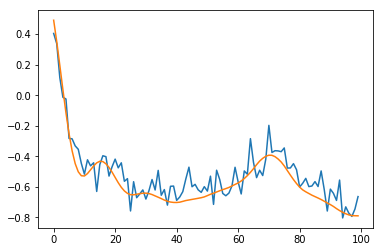

In [6]:
sig_example = inp['trainngset'][1]
clean_example = clean['Yset'][1]
plt.figure(1)
plt.plot(np.real(sig_example[128:228]))
plt.plot(np.real(clean_example[128:228]))
plt.show()

In [17]:
def conv_block2(x, nb_filter = [16, 16], kernel_size = (1,4)):
    k1, k2 = nb_filter
    
    #1
    out = Convolution2D(k1, kernel_size=kernel_size, strides=1, 
                        data_format='channels_last', padding='same',
                        activation=None, init='glorot_uniform')(x)
    out = BatchNormalization()(out)
    out = Activation('relu')(out)
    
    #2
    out = Convolution2D(k2, kernel_size=kernel_size, strides=1, 
                        data_format='channels_last', padding='same',
                        activation=None, init='glorot_uniform')(out)
    out = BatchNormalization()(out)
    out = Activation('relu')(out) 
    #3
    out = merge([out,x],mode='sum')
       
    
    return out
def get_model():
    #init
    inp = Input([2, 1024])
    out = Reshape([2, 1024, 1])(inp)
    out_1 = out
    #part1
    out = Convolution2D(16, kernel_size=(1, 4), strides=1, 
                        data_format='channels_last', padding='same',
                        activation=None, init='glorot_uniform')(out)
    out = BatchNormalization()(out)
    out = Activation('relu')(out)
    
    #part2
    out = conv_block2(out, [16, 16])
    out = conv_block2(out, [16, 16])
    out = conv_block2(out, [16, 16])
    out = conv_block2(out, [16, 16])
    out = conv_block2(out, [16, 16])
    out = conv_block2(out, [16, 16])
    out = conv_block2(out, [16, 16])
    out = conv_block2(out, [16, 16])
    out = conv_block2(out, [16, 16])    
    out = conv_block2(out, [16, 16])
    out = conv_block2(out, [16, 16])     

    #out = conv_block2(out, [16, 16])
    
    #part3
    out = Convolution2D(1, kernel_size=(1, 4), strides=1, 
                               data_format='channels_last', padding='same',
                        activation=None, init='glorot_uniform')(out)
    out = BatchNormalization()(out)
    
    #part4
    out = merge([out,out_1], mode='sum')
    
    #last
    out = Reshape([2, 1024])(out)
    model = Model(inp, out)
    return model
model = get_model()
model.summary()

d:\python35\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, data_format="channels_last", kernel_initializer="glorot_uniform", padding="same", strides=1, kernel_size=(1, 4), activation=None)`
d:\python35\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, data_format="channels_last", kernel_initializer="glorot_uniform", padding="same", strides=1, kernel_size=(1, 4), activation=None)`
  import sys
d:\python35\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, data_format="channels_last", kernel_initializer="glorot_uniform", padding="same", strides=1, kernel_size=(1, 4), activation=None)`
  
d:\python35\lib\site-packages\ipykernel_launcher.py:18: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`,

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_4 (InputLayer)             (None, 2, 1024)       0                                            
____________________________________________________________________________________________________
reshape_7 (Reshape)              (None, 2, 1024, 1)    0           input_4[0][0]                    
____________________________________________________________________________________________________
conv2d_73 (Conv2D)               (None, 2, 1024, 16)   80          reshape_7[0][0]                  
____________________________________________________________________________________________________
batch_normalization_73 (BatchNor (None, 2, 1024, 16)   64          conv2d_73[0][0]                  
___________________________________________________________________________________________

d:\python35\lib\site-packages\ipykernel_launcher.py:52: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, data_format="channels_last", kernel_initializer="glorot_uniform", padding="same", strides=1, kernel_size=(1, 4), activation=None)`
d:\python35\lib\site-packages\ipykernel_launcher.py:56: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.


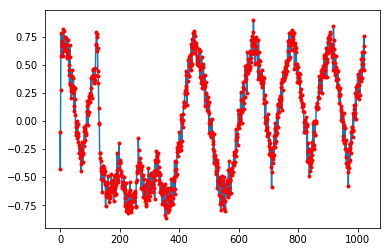

In [13]:
# split to I,Q
inp_sig = np.zeros([len(inp['trainngset']),2,1024])
clean_sig = np.zeros([len(inp['trainngset']),2,1024])
for i in range(len(inp['trainngset'])):
    inp_sig[i][0] = np.real(inp['trainngset'][i])
    inp_sig[i][1] = np.imag(inp['trainngset'][i])
    clean_sig[i][0] = np.real(clean['Yset'][i])
    clean_sig[i][1] = np.imag(clean['Yset'][i])
plt.figure(2)
plt.plot(inp_sig[1][0])
plt.plot(np.real(inp['trainngset'][1]), '.r')
plt.show()

In [14]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(inp_sig, clean_sig,
                                                  test_size = 0.1, random_state=1)

In [19]:
# on small epochs
in_shap = list(X_train.shape[1:]) 
print(in_shap)

model.compile(loss='mse',
                      optimizer='adam',
                      metrics=['mse'])
history = model.fit(X_train, y_train,
                  epochs=10,
                  batch_size=128,
                  verbose=1,
                  #validation_data=None)
                  validation_data=(X_val, y_val))    
# model.save_weights('model_weights_24_16by16_ResNet.h5')


[2, 1024]
Train on 72000 samples, validate on 8000 samples
Epoch 1/10
72000/72000 [==============================] - 180s - loss: 0.4225 - mean_squared_error: 0.4225 - val_loss: 0.0812 - val_mean_squared_error: 0.0812
Epoch 2/10
72000/72000 [==============================] - 175s - loss: 0.0776 - mean_squared_error: 0.0776 - val_loss: 0.0264 - val_mean_squared_error: 0.0264
Epoch 3/10
72000/72000 [==============================] - 175s - loss: 0.0145 - mean_squared_error: 0.0145 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 4/10
72000/72000 [==============================] - 175s - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 5/10
72000/72000 [==============================] - 175s - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0096 - val_mean_squared_error: 0.0096
Epoch 6/10
72000/72000 [==============================] - 176s - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.0091 - val_mean_squared_e

In [20]:
model.save_weights('.\\res\\Net_weight\\model_weights_24_16by16_ResNet.h5')

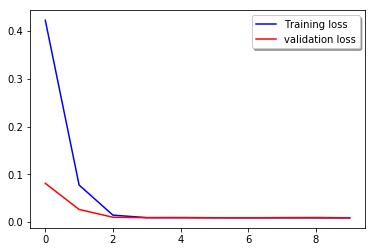

In [24]:
plt.figure(3)
fig, ax = plt.subplots(1,1)
ax.plot(history.history['loss'], color='b', label="Training loss")
ax.plot(history.history['val_loss'], color='r', label="validation loss",axes =ax)
legend = ax.legend(loc='best', shadow=True)

In [25]:
model2 = get_model()
model2.load_weights('.\\res\\Net_weight\\model_weights_24_16by16_ResNet.h5')
y_hat = model2.predict(X_val)

d:\python35\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, data_format="channels_last", kernel_initializer="glorot_uniform", padding="same", strides=1, kernel_size=(1, 4), activation=None)`
d:\python35\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, data_format="channels_last", kernel_initializer="glorot_uniform", padding="same", strides=1, kernel_size=(1, 4), activation=None)`
  import sys
d:\python35\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, data_format="channels_last", kernel_initializer="glorot_uniform", padding="same", strides=1, kernel_size=(1, 4), activation=None)`
  
d:\python35\lib\site-packages\ipykernel_launcher.py:18: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`,

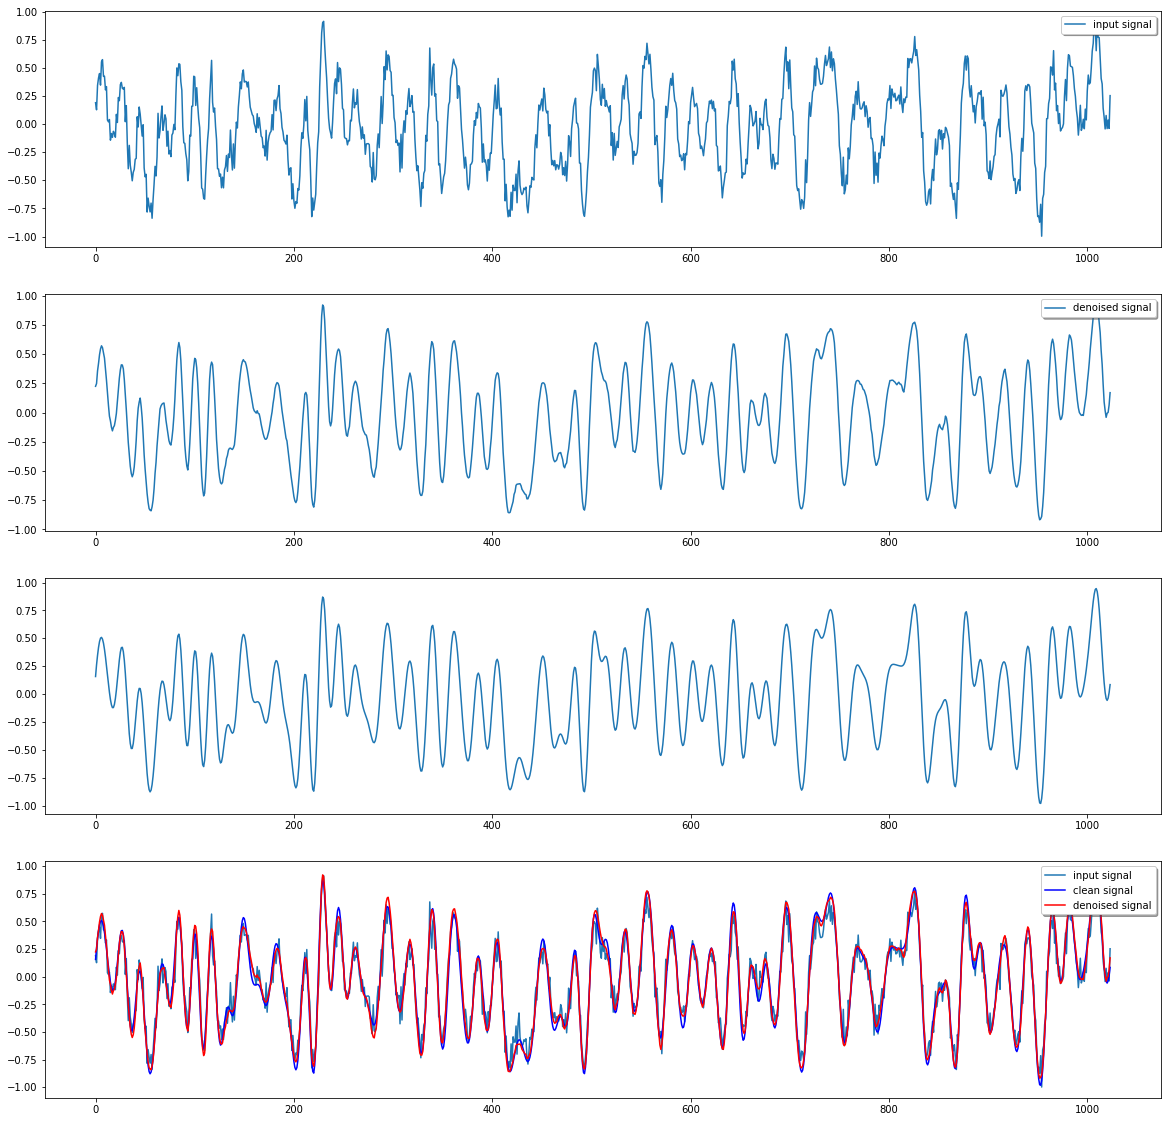

In [37]:
m = 2
plt.figure(4)
fig, ax = plt.subplots(4,1)
fig.set_size_inches(20,20)
ax[0].plot(X_val[m][0], label="input signal")
legend = ax[0].legend(loc=1, shadow=True)
ax[1].plot(y_hat[m][0], label="denoised signal")
legend = ax[1].legend(loc=1, shadow=True)
ax[2].plot(y_val[m][0], label="clean signal")
legend = ax[1].legend(loc=1, shadow=True)

ax[3].plot(X_val[m][0], label="input signal")
ax[3].plot(y_val[m][0],color='b', label="clean signal")
ax[3].plot(y_hat[m][0],color='r', label="denoised signal")
legend = ax[3].legend(loc=1, shadow=True)

